# <font color='FF6F1F'>Case Gol</font>

## <font color='FF6F1F'>Respostas às perguntas de interesse</font>

# Tabela de conteúdo

[1. Informação básica](#1.-Informação-básica)

[2. Bibliotecas](#2.-Bibliotecas)

[3. Dados](#3.-Dados)

[4. Perguntas](#4.-Perguntas)

* [1. Faça um ranking para o número total de PAX por dia da semana.](#1.-Faça-um-ranking-para-o-número-total-de-PAX-por-dia-da-semana.)

* [2. Qual a correlação de sábado e domingo somados com o total de RPK?](#2.-Qual-a-correlação-de-sábado-e-domingo-somados-com-o-total-de-RPK?)

* [3. Qual a média de ‘Monetário’ por mês por Canal? E a mediana?](#3.-Qual-a-média-de-‘Monetário’-por-mês-por-Canal?-E-a-mediana?)

* [4. Crie um forecast de PAX por ‘Local de Venda’ para os próximos 15 dias a contar da última data de venda.](#4.-Crie-um-forecast-de-PAX-por-‘Local-de-Venda’-para-os-próximos-15-dias-a-contar-da-última-data-de-venda.)

* [5. Supondo que você precisa gerar um estudo para a área responsável, com base em qualquer modelo ou premissa, qual ‘Local de Venda’ você considera mais crítico. Por quê?](#5.-Supondo-que-você-precisa-gerar-um-estudo-para-a-área-responsável,-com-base-em-qualquer-modelo-ou-premissa,-qual-‘Local-de-Venda’-você-considera-mais-crítico.-Por-quê?)

* [6. Criar modelo relacionando o comportamento de venda com variáveis não apresentadas nos dados (Ex: PIB, Dolar, etc.)](#6.-Criar-modelo-relacionando-o-comportamento-de-venda-com-variáveis-não-apresentadas-nos-dados-(Ex:-PIB,-Dolar,-etc.))


## 1. Informação básica
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

**Fonte:** Gol

**Período em análise:** de 2016-11-01 a 2017-04-01.

**Descrição das colunas:**

| Variável | Descrição | Tipo |  
|:---|:---|:---|
| Data Venda | Data (AAAA-MM-DD) | Data |
| Canal de Venda | Canais de venda. | Nominal |
| Local de Venda | Locais de venda. | Nominal |
| PAX | Total de passageiros. | Discreto |
| Monetário Vendido | Valores da venda. | Contínuo |
| RPK | Indicador diretamente relacionado com o número de PAX. | Discreto |

## 2. Bibliotecas
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

In [1]:
import pandas as pd # dataframe
import numpy as np # numeric
import seaborn as sns # graph
from matplotlib import pyplot as plt # plot
from pylab import rcParams # figsize

## 3. Dados
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

In [2]:
# suprime a notação científica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
df = pd.read_excel('case_analytics-ds.xlsx', sheet_name='Dados')

In [4]:
df.sample(5)

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK
31,2016-11-02,TeleVenda,Mindscape,75,4606.2650,9320
800,2016-12-21,TeleVenda,Mindscape,183,9719.1982,19273
2210,2017-03-19,TeleVenda,Arena,187,10480.8376,29375
1899,2017-02-27,Telégrafo,Arena,82,5727.4730,11884
738,2016-12-17,TeleVenda,Vast,279,18325.4553,13745


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data Venda         2432 non-null   datetime64[ns]
 1   Canal de Venda     2432 non-null   object        
 2   Local de Venda     2432 non-null   object        
 3   PAX                2432 non-null   int64         
 4   Monetário Vendido  2432 non-null   float64       
 5   RPK                2432 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 114.1+ KB


In [6]:
print(f'O dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataframe possui 2432 linhas e 6 colunas.


In [7]:
print(f"Período em análise: de {df['Data Venda'].min()} a {df['Data Venda'].max()}.")

Período em análise: de 2016-11-01 00:00:00 a 2017-04-01 00:00:00.


In [8]:
# Dados faltantes
total = df.isnull().sum().sort_values(ascending=False)
porcentagem = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
faltante = pd.concat([total, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
faltante.head(45)

,Total,Porcentagem
RPK,0,0.0000
Monetário Vendido,0,0.0000
PAX,0,0.0000
Local de Venda,0,0.0000
Canal de Venda,0,0.0000
Data Venda,0,0.0000


* Não há dados faltantes.

In [9]:
# lista dos canais de venda
df['Canal de Venda'].unique().tolist()

['Telégrafo', 'TeleVenda', 'Porta a Porta']

In [10]:
# lista dos locais de venda
df['Local de Venda'].unique().tolist()

['Mindscape', 'Arena', 'Vast', 'Ellipsis']

In [11]:
df.describe()

,PAX,Monetário Vendido,RPK
count,2432.0000,2432.0000,2432.0000
mean,723.0029,24638.7405,66738.3894
std,735.9365,22424.8429,83479.0395
min,18.0000,1041.5444,1127.0000
25%,100.0000,6122.9205,11372.0000
50%,395.5000,17755.4217,33361.5000
75%,1160.2500,35535.3240,95116.7500
max,4705.0000,144890.7311,695824.0000


## 4. Perguntas
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

### 1. Faça um ranking para o número total de PAX por dia da semana.
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

In [12]:
# cópia do dataframe
df_ = df.copy()

In [13]:
# cria dia da semana
df_['dia_semana'] = df_['Data Venda'].dt.day_name()

In [14]:
# en --> pt
df_.loc[df_['dia_semana'] == 'Monday', 'dia_semana'] = 'segunda-feira'
df_.loc[df_['dia_semana'] == 'Tuesday', 'dia_semana'] = 'terça-feira'
df_.loc[df_['dia_semana'] == 'Wednesday', 'dia_semana'] = 'quarta-feira'
df_.loc[df_['dia_semana'] == 'Thursday', 'dia_semana'] = 'quinta-feira'
df_.loc[df_['dia_semana'] == 'Friday', 'dia_semana'] = 'sexta-feira'
df_.loc[df_['dia_semana'] == 'Saturday', 'dia_semana'] = 'sábado'
df_.loc[df_['dia_semana'] == 'Sunday', 'dia_semana'] = 'domingo'

In [15]:
df_.sample(5)

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK,dia_semana
1672,2017-02-13,Porta a Porta,Mindscape,570,17284.3662,69559,segunda-feira
1722,2017-02-16,Porta a Porta,Ellipsis,736,21492.7677,39845,quinta-feira
1795,2017-02-21,TeleVenda,Ellipsis,1232,20811.5298,70753,terça-feira
551,2016-12-05,Porta a Porta,Mindscape,797,26060.4868,91083,segunda-feira
242,2016-11-16,TeleVenda,Arena,2155,86479.0009,315391,quarta-feira


In [16]:
df_.groupby(by='dia_semana')['PAX'].sum().sort_values(ascending=False)

dia_semana
quarta-feira     293025
quinta-feira     258488
sexta-feira      255625
sábado           253467
domingo          241620
segunda-feira    236316
terça-feira      219802
Name: PAX, dtype: int64

| Dia da semana | Total de passageiros |
|:--|:--:|
| quarta-feira | 293025 |
| quinta-feira | 258488 |
| sexta-feira  | 255625 |
| sábado       | 253467 |
| domingo      | 241620 |
| segunda-feira| 236316 |
| terça-feira  | 219802 |

* O dia com maior número de passageiros, em todo período, é quarta-feira.

### 2. Qual a correlação de sábado e domingo somados com o total de RPK?
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

In [17]:
# dia da semana: segunda-feira == 0; domingo == 6
df_['dia_semana_num'] = df_['Data Venda'].dt.dayofweek

In [18]:
df_.sample(3)

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK,dia_semana,dia_semana_num
903,2016-12-27,TeleVenda,Arena,907,19614.1483,134343,terça-feira,1
1461,2017-01-31,Telégrafo,Mindscape,40,3140.9465,5430,terça-feira,1
1251,2017-01-18,Telégrafo,Mindscape,67,3693.7161,8861,quarta-feira,2


In [19]:
df_.groupby('dia_semana_num').agg({'RPK': ['sum']})

,RPK
,sum
dia_semana_num,
0,23275908
1,20366840
2,26263705
3,23501102
4,23309936
5,23201577
6,22388695


In [20]:
sabado_RPK = df_[['dia_semana_num','RPK']].query('`dia_semana_num` == 5').sum()
sabado_RPK

dia_semana_num        1760
RPK               23201577
dtype: int64

In [21]:
domingo_RPK = df_[['dia_semana_num','RPK']].query('`dia_semana_num` == 6').sum()
domingo_RPK

dia_semana_num        2016
RPK               22388695
dtype: int64

In [22]:
total_RPK = df_['RPK'].sum()
total_RPK

162307763

In [23]:
RPK_sab_dom = (sabado_RPK[1] + domingo_RPK[1]) / total_RPK

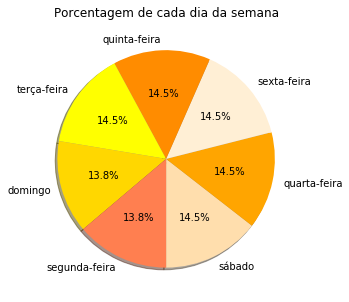

In [24]:
labels = df_['dia_semana'].value_counts(sort = True).index
sizes = df_['dia_semana'].value_counts(sort = True)

colors = ["navajowhite", "orange", "papayawhip", "darkorange", "yellow", "gold", "coral"]
 
rcParams['figure.figsize'] = 5, 5
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Porcentagem de cada dia da semana')
plt.show()

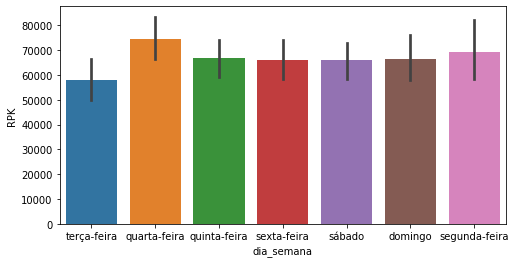

In [25]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x='dia_semana', y='RPK', data=df_)

In [26]:
print(f'Sábado e domingo representam 28.3% dos dias registrados e {round(RPK_sab_dom * 100, 2)}% do total RPK.') 

Sábado e domingo representam 28.3% dos dias registrados e 28.09% do total RPK.


### 3. Qual a média de ‘Monetário’ por mês por Canal? E a mediana?
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

In [27]:
# coluna 'mês'
df_['mês'] = df['Data Venda'].dt.month

In [28]:
df_.sample(5)

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK,dia_semana,dia_semana_num,mês
584,2016-12-07,Porta a Porta,Arena,924,44546.0640,130811,quarta-feira,2,12
35,2016-11-03,Porta a Porta,Mindscape,987,38006.2928,115339,quinta-feira,3,11
691,2016-12-14,Telégrafo,Ellipsis,53,2074.1854,3005,quarta-feira,2,12
319,2016-11-20,Telégrafo,Mindscape,59,5074.2760,7892,domingo,6,11
2291,2017-03-24,TeleVenda,Ellipsis,1307,39150.8724,75166,sexta-feira,4,3


In [29]:
df_.groupby(['Canal de Venda', 'mês']).agg({'Monetário Vendido': ['mean', 'median']})

Monetário Vendido           
                                mean     median
Canal de Venda mês                             
Porta a Porta  1          31320.5695 28823.0253
               2          31710.1489 29711.5801
               3          31055.9398 30488.1910
               4          33319.4963 32421.6094
               11         34638.0718 30262.9780
               12         28615.4525 25527.5193
TeleVenda      1          32868.8814 19085.1232
               2          32208.4458 18926.6902
               3          32132.2467 18666.8800
               4          35795.7819 28091.8856
               11         30963.4593 18757.7078
               12         28045.7215 17567.6009
Telégrafo      1           4234.0226  3782.2489
               2           4307.6263  4045.8931
               3           4568.1485  4345.5596
               4           3778.5918  3458.8847
               11          4614.3101  4029.1321
               12          5212.6481  4227.5779

### 4. Crie um forecast de PAX por ‘Local de Venda’ para os próximos 15 dias a contar da última data de venda.
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

In [30]:
# seleção das colunas
df_ts = df_[['Data Venda', 'PAX']].copy()

In [31]:
df_ts.sample(5)

,Data Venda,PAX
1278,2017-01-19,59
1158,2017-01-12,2245
1471,2017-01-31,81
1090,2017-01-08,280
2231,2017-03-20,931


In [32]:
df_ts.dtypes

Data Venda    datetime64[ns]
PAX                    int64
dtype: object

In [33]:
# define data como index
ts = df_ts.set_index('Data Venda')

In [34]:
ts.head()

,PAX
Data Venda,
2016-11-01,30
2016-11-01,52
2016-11-01,19
2016-11-01,496
2016-11-01,46


In [35]:
ts.index

DatetimeIndex(['2016-11-01', '2016-11-01', '2016-11-01', '2016-11-01',
               '2016-11-01', '2016-11-01', '2016-11-01', '2016-11-01',
               '2016-11-01', '2016-11-01',
               ...
               '2017-04-01', '2017-04-01', '2017-04-01', '2017-04-01',
               '2017-04-01', '2017-04-01', '2017-04-01', '2017-04-01',
               '2017-04-01', '2017-04-01'],
              dtype='datetime64[ns]', name='Data Venda', length=2432, freq=None)

In [36]:
# adiciona colunas
ts['ano'] = ts.index.year
ts['mes'] = ts.index.month
ts['dia_semana'] = ts.index.weekday
# Display a random sampling of 5 rows
ts.sample(5, random_state=0)

,PAX,ano,mes,dia_semana
Data Venda,,,,
2016-12-13,2714,2016,12,1
2017-03-24,769,2017,3,4
2016-12-23,238,2016,12,4
2016-12-18,599,2016,12,6
2016-11-10,2338,2016,11,3


In [37]:
ts.loc['2016-11']

,PAX,ano,mes,dia_semana
Data Venda,,,,
2016-11-01,30,2016,11,1
2016-11-01,52,2016,11,1
2016-11-01,19,2016,11,1
2016-11-01,496,2016,11,1
2016-11-01,46,2016,11,1
...,...,...,...,...
2016-11-30,62,2016,11,2
2016-11-30,1486,2016,11,2
2016-11-30,892,2016,11,2


In [38]:
#sns.set(rc={'figure.figsize':(18, 8)})

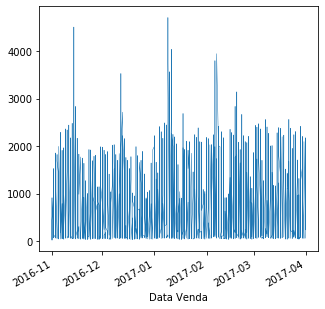

In [39]:
# gráfico de linha da série de tempo completa
ts['PAX'].plot(linewidth=0.5);

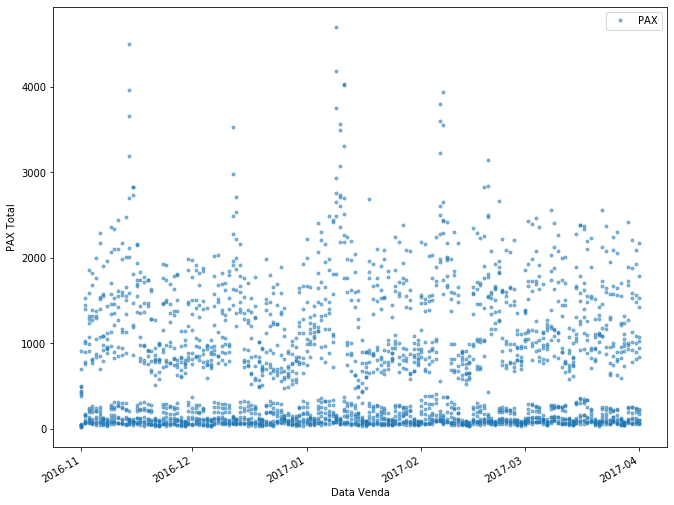

In [40]:
cols_plot = ['PAX']
axes = ts[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('PAX Total')

* Há certa sazonalidade, alguns períodos se repetindo apesar de alguns picos em algumas datas (provável influência de feriados).

Text(0, 0.5, 'PAX')

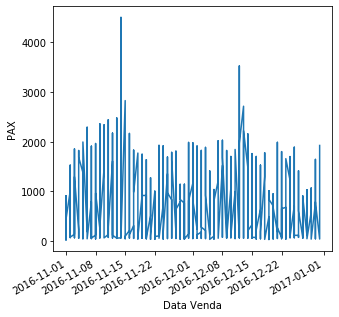

In [41]:
ax = ts.loc['2016', 'PAX'].plot()
ax.set_ylabel('PAX')

Text(0, 0.5, 'PAX')

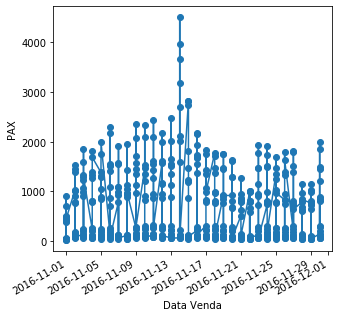

In [42]:
# pico em 2016-11
ax = ts.loc['2016-11', 'PAX'].plot(marker='o', linestyle='-')
ax.set_ylabel('PAX')

* Véspera de feriado.

Text(0, 0.5, 'PAX')

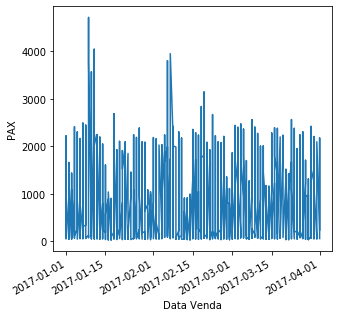

In [43]:
ax = ts.loc['2017', 'PAX'].plot()
ax.set_ylabel('PAX')

Text(0, 0.5, 'PAX')

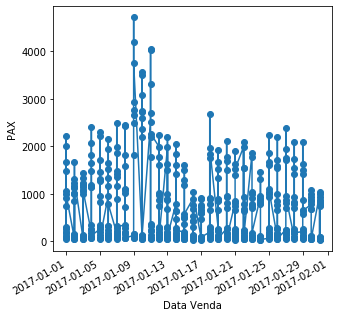

In [44]:
# pico em 2017-01
ax = ts.loc['2017-01', 'PAX'].plot(marker='o', linestyle='-')
ax.set_ylabel('PAX')

* Pico em 2017-01-09.

### 5. Supondo que você precisa gerar um estudo para a área responsável, com base em qualquer modelo ou premissa, qual ‘Local de Venda’ você considera mais crítico. Por quê?
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

In [45]:
# Monerário Vendido por Canal de Venda - período total
df_.groupby('Local de Venda').agg({'Monetário Vendido': ['mean', 'median', 'sum']})

Monetário Vendido                         
                            mean     median           sum
Local de Venda                                           
Arena                 31592.2506 21175.8940 19208088.3897
Ellipsis              18446.3899 16457.5369 11215405.0803
Mindscape             24242.9410 13115.2288 14739708.1499
Vast                  24273.3804 18908.0026 14758215.2707

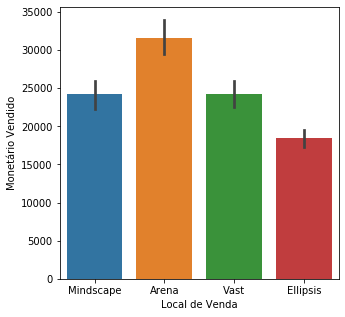

In [46]:
sns.barplot(x='Local de Venda', y='Monetário Vendido', data=df_)

* O local de venda mais crítico é Ellipsis, possui um total de vendas no período mais baixo comparando-o com os outros locais.

### 6. Criar modelo relacionando o comportamento de venda com variáveis não apresentadas nos dados (Ex: PIB, Dolar, etc.)
[Retorna à Tabela de conteúdo](#Tabela-de-conteúdo)

In [47]:
# cria ano
df_['ano'] = df['Data Venda'].dt.year

In [48]:
# lista anos 
df_['ano'].unique().tolist()

[2016, 2017]

In [49]:
# lista meses 
df_['mês'].unique().tolist()

[11, 12, 1, 2, 3, 4]

In [50]:
# https://economia.acspservicos.com.br/indicadores_iegv/iegv_dolar.html
## dict = {mês: dólar}
dolar_2016 = {1: 4.054, 2: 3.978, 3: 3.694, 4: 3.551, 11: 3.339, 12: 3.351}
dolar_2017 = {1: 3.197, 2: 3.103, 3: 3.127, 4: 3.140, 11: 3.257, 12: 3.297} 

# cria coluna dólar
for d in df_['ano']:
    if df_['ano'][d] == 2016:
        df_['dólar'] = df_['mês'].map(dolar_2016)
    else:
        df_['dólar'] = df_['mês'].map(dolar_2017)

In [51]:
# https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas
## dict = {mês: ipca(%)}
ipca_2016 = {1: 1.27, 2: 0.90, 3: 0.43, 4: 0.61, 11: 0.18, 12: 0.30}
ipca_2017 = {1: 0.38, 2: 0.33, 3: 0.25, 4: 0.14, 11: 0.28, 12: 0.44}

# cria coluna ipca
for i in df_['ano']:
    if df_['ano'][i] == 2016:
        df_['ipca'] = df_['mês'].map(ipca_2016)
    else:
        df_['ipca'] = df_['mês'].map(ipca_2017)

In [52]:
df_.sample(3)

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK,dia_semana,dia_semana_num,mês,ano,dólar,ipca
1641,2017-02-11,Porta a Porta,Arena,732,31157.2536,110137,sábado,5,2,2017,3.1030,0.3300
1226,2017-01-16,Telégrafo,Arena,84,4775.1901,12513,segunda-feira,0,1,2017,3.1970,0.3800
16,2016-11-02,TeleVenda,Ellipsis,1007,29177.2330,54696,quarta-feira,2,11,2016,3.2570,0.2800


In [53]:
df_[['Monetário Vendido','mês', 'ano', 'dólar', 'ipca']].describe()

,Monetário Vendido,mês,ano,dólar,ipca
count,2432.0000,2432.0000,2432.0000,2432.0000,2432.0000
mean,24638.7405,5.8289,2016.5987,3.1973,0.3352
std,22424.8429,4.7079,0.4903,0.0735,0.0706
min,1041.5444,1.0000,2016.0000,3.1030,0.1400
25%,6122.9205,2.0000,2016.0000,3.1270,0.2800
50%,17755.4217,3.0000,2017.0000,3.1970,0.3300
75%,35535.3240,11.0000,2017.0000,3.2570,0.3800
max,144890.7311,12.0000,2017.0000,3.2970,0.4400


In [54]:
corr = df_[['Monetário Vendido','mês', 'ano', 'dólar', 'ipca']].corr()
corr

,Monetário Vendido,mês,ano,dólar,ipca
Monetário Vendido,1.0000,-0.0310,0.0283,-0.0304,-0.0357
mês,-0.0310,1.0000,-0.9879,0.8515,0.2606
ano,0.0283,-0.9879,1.0000,-0.8921,-0.3028
dólar,-0.0304,0.8515,-0.8921,1.0000,0.5519
ipca,-0.0357,0.2606,-0.3028,0.5519,1.0000


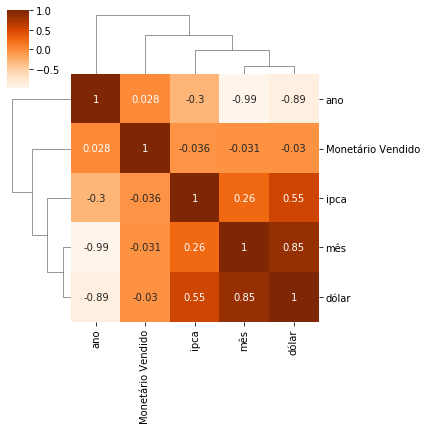

In [55]:
sns.clustermap(corr, cmap='Oranges', annot = True, figsize=(6, 6))

In [56]:
#df_['PAX'].to_csv('pax.txt', sep='\t', index=False, header=False)